<a href="https://colab.research.google.com/github/LuisMig-code/Prevendo-a-pontuacao-de-felicidade-de-uma-nacao/blob/main/Prevendo_o_n%C3%ADvel_de_felicidade_de_uma_Populacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fazendo Previsões do nível de Felicidade de uma população com *Machine Learning*

Com o avançar da tecnologia e a automação de muitos processos na industria e na ciência , vimos um processo de ocificação na sociedade , ou seja , agora temos mais tempo livre (*isso em tese , mas no geral o efeito que tende a ser observado em muitas profissões é esse*) para tarefas de autoconhecimento. A ideia de felicidade voltou a ser questionada na sociedade , com muitos interpretando-as de diferentes formas.

<img src="https://images.pexels.com/photos/6945/sunset-summer-golden-hour-paul-filitchkin.jpg?cs=srgb&dl=pexels-snapwire-6945.jpg&fm=jpg" width=650px>

## Contexto

O *World Happiness Report* ou  Relatório de felicidade mundial é uma pesquisa histórica do estado de felicidade global que classifica 156 países de acordo com o grau de felicidade de seus cidadãos , baseados em critérios economicos , sociais e emocionais.

A partir dele , neste projeto , tentaremos obter um Modelo de Aprendizagem de Máquinas que visa obter uma pontuação aproximada do "Nível de Felicidade" da população

## Importando os Dados

Os dados ultilizados aqui foram extraidos do Kaggle , você pode acessá-los clicando [aqui](https://www.kaggle.com/unsdsn/world-happiness)

Nosso conjunto de dados possui um total de 9 colunas e pouco mais de 156 entradas(cada entrada representa um país)

**obs**: *Os dados usados serão os mais recentes , no caso do ano de 2019*

In [64]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

In [65]:
path = "https://www.dropbox.com/s/1exkft9dwn5x6c2/2019.csv?dl=1"
dados = pd.read_csv(path).drop(["Country or region","Overall rank"] , axis =1)

Por padrão nossos dados vêm com as colunas em inglês , seria interessantes que estivessem em português para uma melhor análise 

In [66]:
dados.columns = ["pontuacao","renda_per_capita","suporte_social","expectativa_de_vida_saudavel","Liberdade_para_fazer_escolhas_de_vida","generosidade","percepcao_de_corrupcao"]

In [67]:
dados.head()

,pontuacao,renda_per_capita,suporte_social,expectativa_de_vida_saudavel,Liberdade_para_fazer_escolhas_de_vida,generosidade,percepcao_de_corrupcao
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Análise Exploratória

Agora que já temos todos os nossos dados organizados em em nosso projeto , vamo começar a por a mão na massa. 

O fundamental no começo a saber os tipos de variáveis que temos , se há dados nulos , um breve descrição geral e a correlação entre nossas variáveis, mas vamos por partes.

### Dicionário dos nossos dados:

In [68]:
# Size do nosso DataSet

print("Em nossos dados temos:")
print("{} colunas e {} linhas utilizáveis".format(dados.shape[0],dados.shape[1]))

Em nossos dados temos:
156 colunas e 7 linhas utilizáveis


Dicionário das Nossas Colunas:


1.   **pontuacao** : Trata-se da pontuação de "felicidade" que um país pode ter , indo de 0 à 1 , sendo que está é a nossa **variável alvo**
2.   **renda_per_capita** : Razão da Renda Nacional(PIB) pelo número de habitantes do país
3.   **suporte_social** : Suporte recebido pelo governo
4.   **expectativa_de_vida_saudavel** : Expectativa de vida 
5.   **Liberdade_para_fazer_escolhas_de_vida** : Grau de Liberdade econômica de um pais
6.   **generosidade** : Nível de generosidade de uma nação
7.   **percepcao_de_corrupcao** : Grau de percepção de desvios de verba da população com relação à políticos


*obs:você deve ter observados que algumas variáveis(features) só vão de 0 à 1 , e outra não , o que acontece é que nossos dados (provavelemente) já vieram escalados , por isso estão "estranhos" , como você deve ter notados , não há como ter expectativa de vida de 0.986*



### Vamos analisar também se há dados nulos em nosso *DataSet*

In [69]:
dados.isnull().sum()

pontuacao                                0
renda_per_capita                         0
suporte_social                           0
expectativa_de_vida_saudavel             0
Liberdade_para_fazer_escolhas_de_vida    0
generosidade                             0
percepcao_de_corrupcao                   0
dtype: int64

é importante está ultima análise a fim de evitar quaisquer problema ou erro com nosso Modelo

### Vamos ver como se comportam nossas variáveis fazendo uma breve descrição delas

In [70]:
dados.dtypes

pontuacao                                float64
renda_per_capita                         float64
suporte_social                           float64
expectativa_de_vida_saudavel             float64
Liberdade_para_fazer_escolhas_de_vida    float64
generosidade                             float64
percepcao_de_corrupcao                   float64
dtype: object

In [71]:
dados.describe()

,pontuacao,renda_per_capita,suporte_social,expectativa_de_vida_saudavel,Liberdade_para_fazer_escolhas_de_vida,generosidade,percepcao_de_corrupcao
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


O que podemos observar é que temos somente dados númericos (o que é muito importante na hora da escolha do nosso Modelo a ser usado)


Outra coisa interessante a ser observada é que alguns dados como generosidade e liberdade para fazer escolhas tem variações relativamente pequenas

### Correlação das variáveis

O que nos interessa é a correlação entre as outras variáveis e nossa pontuação , podemos analisá-la a seguir

In [72]:
dados.corr().iloc[[0]]

,pontuacao,renda_per_capita,suporte_social,expectativa_de_vida_saudavel,Liberdade_para_fazer_escolhas_de_vida,generosidade,percepcao_de_corrupcao
pontuacao,1.0,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613


Podemos observar que renda per capita , suporte social e expectativa são realmente relevantes , já outros fatores como generosidade ou percepção de corrupção não parecem ser tão relevantes para a felicidade de um país.

Interessante seria também se pudéssemos ver essas análises de forma gráfica , vamos?

## Análises Gráficas

O que faremos a priori será um *heatmap*(mapa de calor) da correlação das variáveis para vermos como se comportam

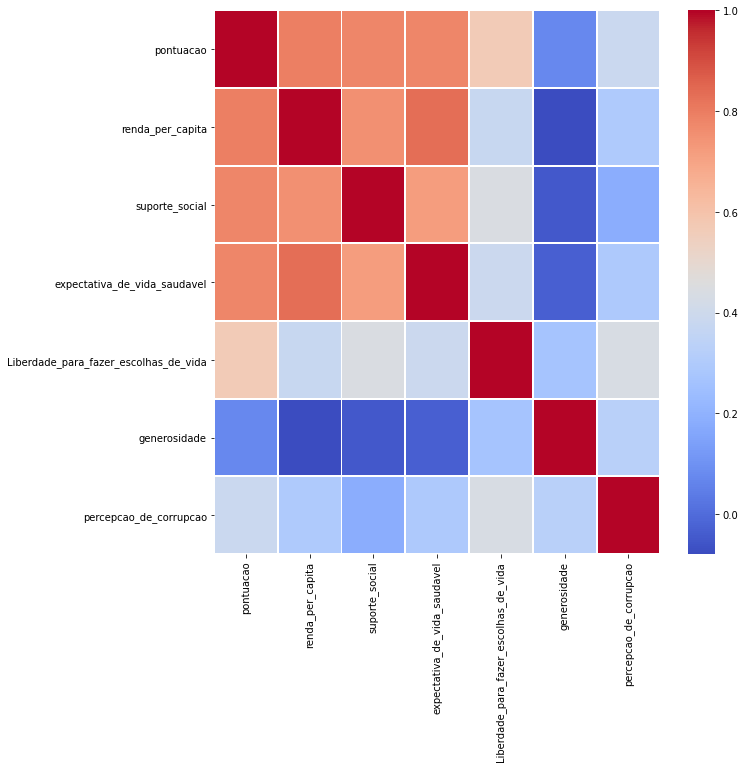

In [73]:
# plotando o heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dados.corr(), cmap='coolwarm', ax=ax , linewidths=.9)
plt.show()

Vamos ver também como se comporta a dispersão das nossas *features* em gráficos com a pontuação

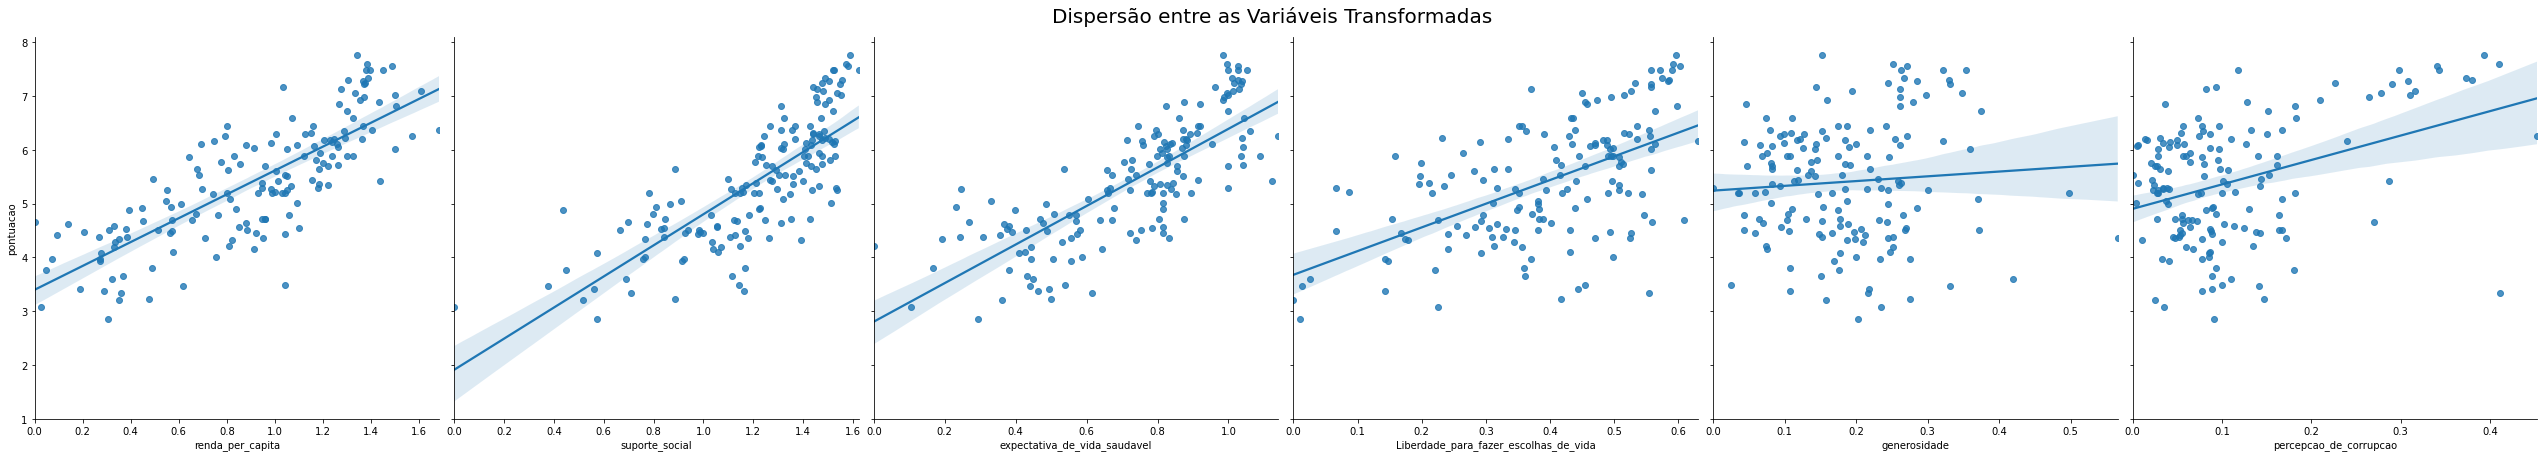

In [74]:
# plotando gráfico de Dispersão
ax = sns.pairplot(dados, y_vars='pontuacao', x_vars=['renda_per_capita',	'suporte_social'	, 'expectativa_de_vida_saudavel',	'Liberdade_para_fazer_escolhas_de_vida',	'generosidade' ,	'percepcao_de_corrupcao'], height=6 , kind="reg")
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

No geral , todas parecem serem diretamente proporcionais , nenhuma parece que faz a pontuação diminuir , como a própria linha do gráfico indica

Por fim , gostaria de analisar a distribuição das variáveis (*features*) a fim de ver se há algum outlier que possa prejudicar nossa análise 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


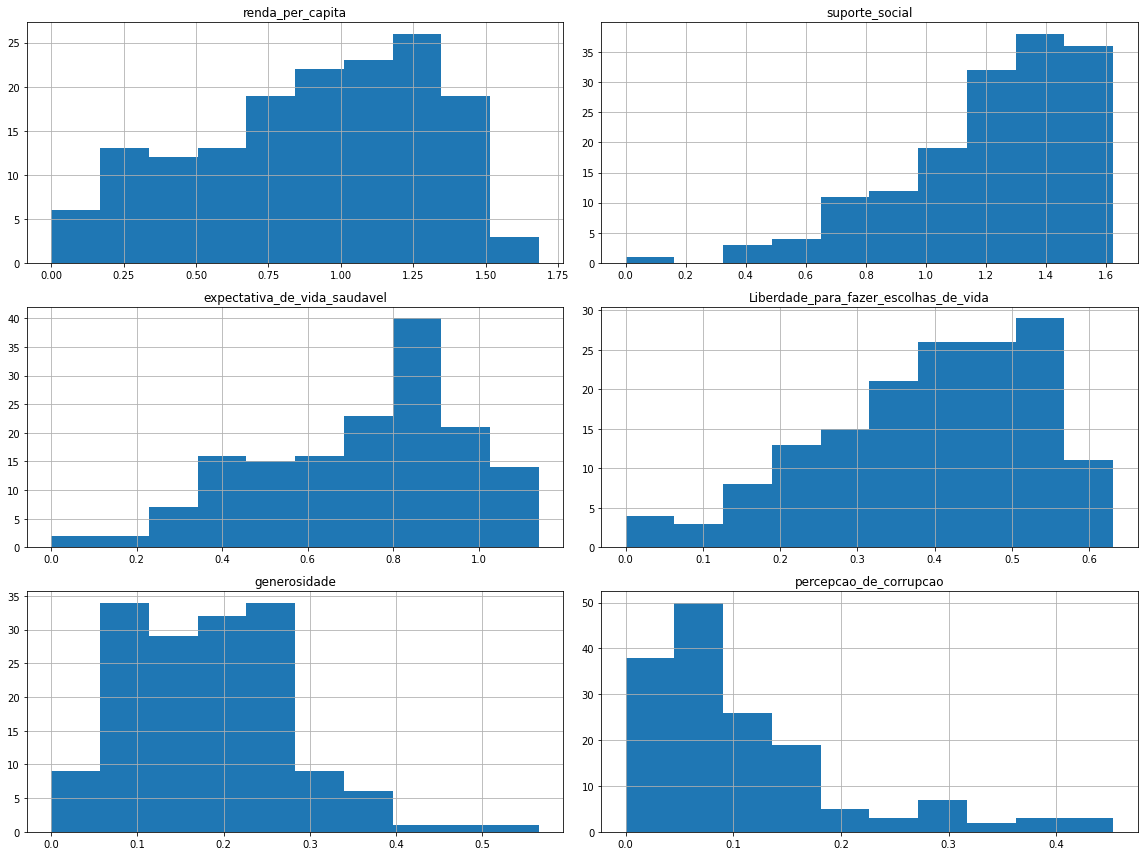

In [75]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(16,12))
dados.drop('pontuacao', axis=1).hist(ax=ax,)
plt.tight_layout()
ax=ax

Como observamos , parece não ter nenhum outlier que possa prejudicar nossa análise

## Machine Learning

O que estamos fazendo nesse projeto é um Regressão Linear para prever a pontuação , e para isso existem diversos Regressores que podemos usar , assim como costumo fazer, irei mostrar 3 deles para no fim decidirmos o que se sobressai , são eles:


*   **Linear Regression**
*   **Kernel Ridge**
*   **SVR (Support Vector Regression)**

Mas antes de vermos cada vamos fazer uma divisão em nossos dados de treino e teste e dedicar uma função que treine nosso modelo



In [76]:
# divisão dos dados

X = dados.drop("pontuacao", axis=1)
y = dados['pontuacao']

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.3,random_state=28,shuffle=True )

In [77]:
def show_modelo(algoritmo , X_treino, X_teste, y_treino, y_teste):
  modelo = algoritmo()
  modelo.fit(X_treino,y_treino)

  score = modelo.score(X_teste,y_teste)
  print("Accurácia do modelo: ",score.round(3))

### Linear Regression

O que o Linear Regression faz , assim como a maioria dos outros Regressores , é buscar uma equação de "n" elementos (n1,n2,n3,...n) de forma a criar uma função que encontre o valor alvo (Y) usando as features , criando um gráfico

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/220px-Linear_regression.svg.png" width=300px>

In [78]:
show_modelo(LinearRegression , X_treino, X_teste, y_treino, y_teste)

Accurácia do modelo:  0.782


### SVR (Support Vector Regression)

"O SVR realiza uma previsão de desempenho melhor do que outros algoritmos como Regressão Linear, KNN e Elastic Net, devido às estratégias de otimização aprimoradas para um amplo conjunto de variáveis. Além disso, também é flexível para lidar com geometria, transmissão, generalização de dados e funcionalidade adicional do kernel. Essa funcionalidade adicional aumenta a capacidade do modelo para previsões, considerando a qualidade dos recursos."

[fonte](https://medium.com/analytics-vidhya/support-vector-regression-svr-model-a-regression-based-machine-learning-approach-f4641670c5bb)

In [79]:
show_modelo(SVR , X_treino, X_teste, y_treino, y_teste)

Accurácia do modelo:  0.815


Como o esperado , o SVR se mostrou melhor para nossa previsão de pontuação

*obs: Vale relembrar que tanto o SVR quando o Kernel Ridge não criar equações que formam uma reta, como o gráfico mostra*

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_0011.png">

### Kernel Ridge

In [80]:
show_modelo(KernelRidge , X_treino, X_teste, y_treino, y_teste)

Accurácia do modelo:  0.681


Em tese , o Kernel Ridge deveria ter um desempenho próximo ao SVR , entretando , ele é mais recomendado(optmizado) para grandes dados , e não conjuntos pequenos como esse que temos

## Conclusão

Em nosso modelo de Regressão notamos que o melhor algoritmo foi o SVR , a partir dele obtivemos um modelo que com 80% de acurácia pode prever a pontuação de felicidade de uma nação. O interessante deste nosso *DataSet* é que facilmente podemos monstar outras predições , como saber qual a "taxa de generosidade" de um país ou a expectativa de vida, mas por hora o que temos já é interessante.